# Manually verify proper scaling of second-order Laplacian

In [1]:
%matplotlib inline

import glob
import numpy as np
import matplotlib.pyplot as plt

from operator import itemgetter

FONTSIZE = 16

def get_sorted_filenames(pattern):
    tmp = [(f, float(f.split("_")[1])) for f in glob.glob(pattern)]
    return [fname for fname, _ in sorted(tmp, key=itemgetter(1))]

filenames = get_sorted_filenames('RuntimeF90Test_*_*.dat')
data_f = np.zeros([len(filenames), 4])
for j, fname in enumerate(filenames):
    data_f[j, :] = np.loadtxt(fname, delimiter=',')

log_dx_f  = np.log(data_f[:-3, 0])
log_err_f = np.log(data_f[:-3, 3])
fit_f = np.polyfit(log_dx_f, log_err_f, 1)

filenames = get_sorted_filenames('RuntimeCppTest_*_*.dat')
data_c = np.zeros([len(filenames), 4])
for j, fname in enumerate(filenames):
    data_c[j, :] = np.loadtxt(fname, delimiter=',')

log_dx_c  = np.log(data_c[:-3, 0])
log_err_c = np.log(data_c[:-3, 3])
fit_c = np.polyfit(log_dx_c, log_err_c, 1)

print('')
print('Fortran order of convergence\t\t{:.12f}'.format(fit_f[0]))
print('C++     order of convergence\t\t{:.12f}'.format(fit_c[0]))


Fortran order of convergence		2.000000000197
C++     order of convergence		1.999999999265


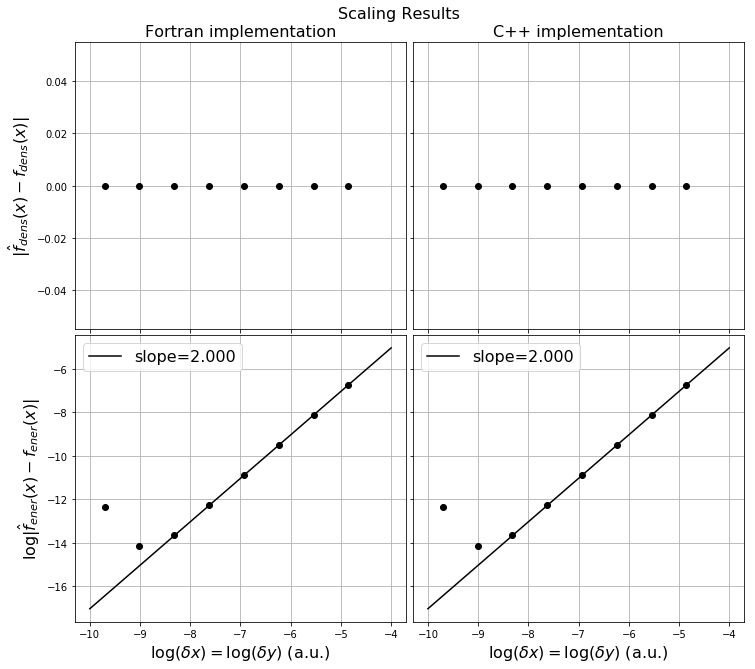

In [2]:
plt.figure(1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.02, wspace=0.02, top=0.93)
plt.suptitle('Scaling Results', fontsize=FONTSIZE)

x_data = [-10, -4]

subp = plt.subplot(221)
plt.title('Fortran implementation', fontsize=FONTSIZE)
plt.plot(np.log(data_f[:, 0]), data_f[:, 2], 'ok')
plt.ylabel(r'$|\hat{f}_{dens}(x) - f_{dens}(x)|$', fontsize=FONTSIZE)
plt.grid(True)
for each in plt.gca().get_xticklabels():
    each.set_visible(False)

plt.subplot(222, sharex=subp, sharey=subp)
plt.title('C++ implementation', fontsize=FONTSIZE)
plt.plot(np.log(data_c[:, 0]), data_c[:, 2], 'ok')
plt.grid(True)
for each in plt.gca().get_xticklabels():
    each.set_visible(False)
for each in plt.gca().get_yticklabels():
    each.set_visible(False)
    
subp2 = plt.subplot(223, sharex=subp)
plt.plot(np.log(data_f[:, 0]), np.log(data_f[:, 3]), 'ok')
plt.plot(x_data, np.polyval(fit_f, x_data), '-k', label='slope={:.3f}'.format(fit_f[0]))
plt.legend(fontsize=FONTSIZE)
plt.grid(True)
plt.xlabel(r'$\log(\delta x) = \log(\delta y)$ (a.u.)', fontsize=FONTSIZE)
_ = plt.ylabel(r'$\log|\hat{f}_{ener}(x) - f_{ener}(x)|$', fontsize=FONTSIZE)

plt.subplot(224, sharex=subp, sharey=subp2)
plt.plot(np.log(data_c[:, 0]), np.log(data_c[:, 3]), 'ok')
plt.plot(x_data, np.polyval(fit_c, x_data), '-k', label='slope={:.3f}'.format(fit_c[0]))
plt.legend(fontsize=FONTSIZE)
plt.grid(True)
_ = plt.xlabel(r'$\log(\delta x) = \log(\delta y)$ (a.u.)', fontsize=FONTSIZE)
for each in plt.gca().get_yticklabels():
    each.set_visible(False)